BEST CODE WITH ALL FEATURES

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 1 min
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 9 days !!!"
H2O_cluster_name:,H2O_from_python_milen_y17qys
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.131 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
00:47:10.305: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
00:47:10.307: AutoML: XGBoost is not available; skipping it.

█████████████████████████████████████████████████████████████
00:52:11.897: GBM_lr_annealing_selection_AutoML_5_20231029_04710 [GBM lr_annealing] failed: water.exceptions.H2OIllegalArgumentException: Can only convert jobs producing a single Model or ModelContainer.

█| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 54.0397
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2920.2878429627176
RMSE: 54.03968766529575
MAE: 36.7601995172

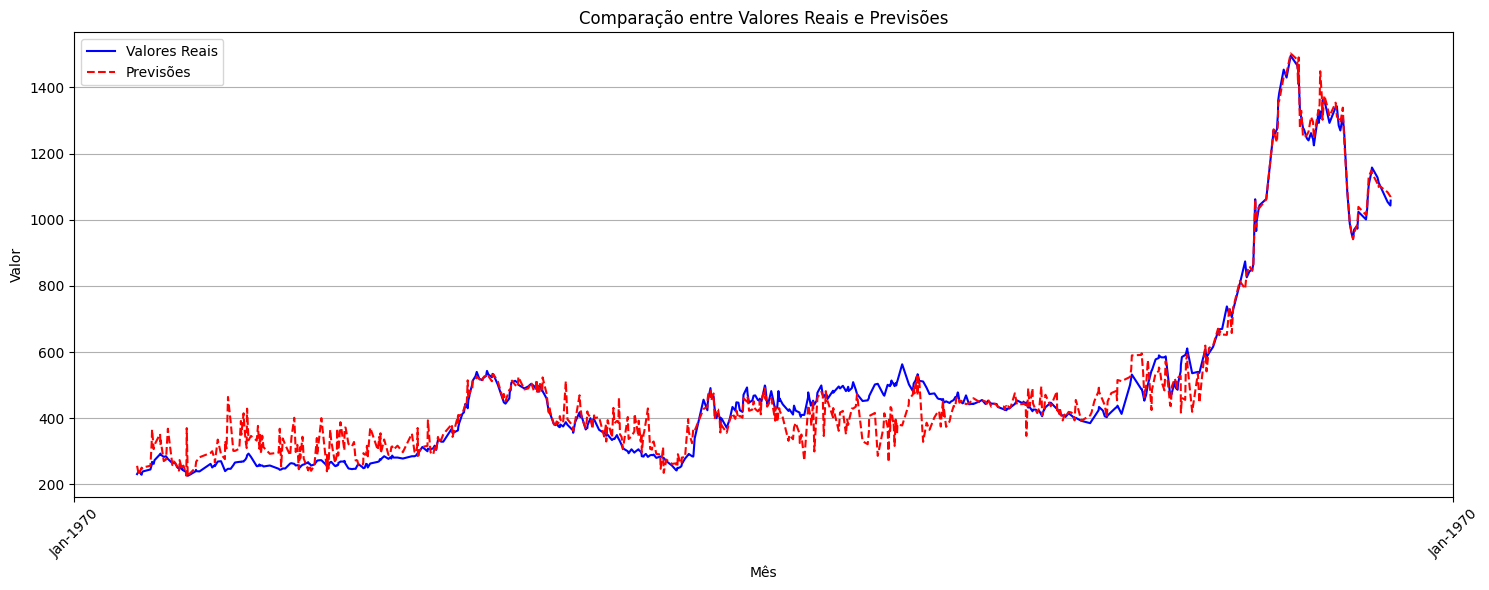

In [5]:
# 1. Instalação e Importação
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/base3.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

print(df_actual_vs_predicted.head())

# Extracting the "Data" column from the test set and converting to pandas DataFrame
dates_df = test["Data"].as_data_frame()
# ... [O restante do código permanece o mesmo]

# Ensure the dates are in datetime format
dates_df['Data'] = pd.to_datetime(dates_df['Data'])

# Extract the dates to a list for plotting
dates = dates_df['Data'].tolist()

# 9. Visualização das previsões vs valores reais
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))

# Use 'dates' for the x-axis
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")

plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Mês")
plt.ylabel("Valor")

# Ajuste nas etiquetas do eixo x para mostrar os meses como "Jan", "Fev", "Mar", etc.
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())  # Use only the first day of each month
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

Base sem URAMA

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 15 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 9 days !!!"
H2O_cluster_name:,H2O_from_python_milen_y17qys
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.367 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
02:00:45.901: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
02:00:45.902: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 62.2841
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 3879.303724990841
RMSE: 62.28405674802213
MAE: 41.25246471136718
RMSLE: 0.1587921751267113
Mean Residual Deviance: 3879.303724990841
R^2: 0.9501477159696303
Null degrees of freedom: 664
Residual degrees of freedom: 656
Null deviance: 51749839.65049533
Residual devian

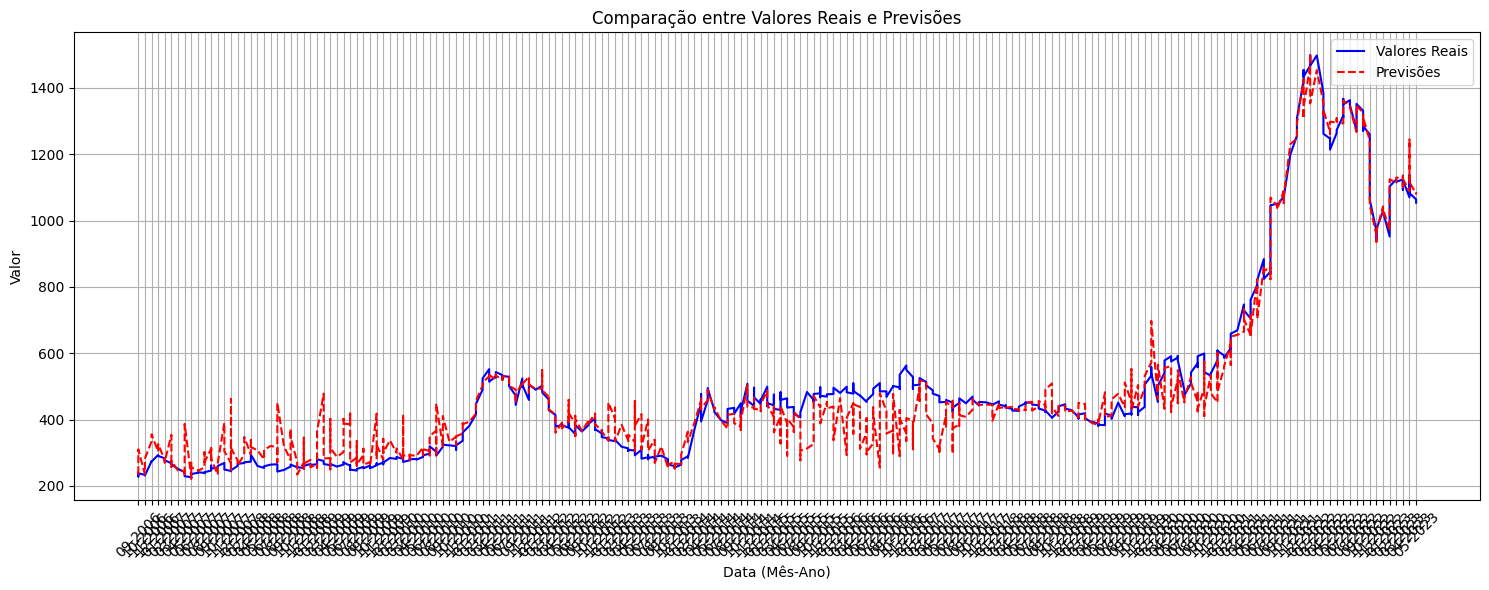

In [9]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

from h2o.automl import H2OAutoML

# 1. Instalação e Importação
# (Já fornecido)

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_URAMA.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Data", "Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted['Data'] = pd.to_datetime(df_actual_vs_predicted['Data'], unit='ms')
df_actual_vs_predicted['Mes_Ano'] = df_actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais
dates = df_actual_vs_predicted["Mes_Ano"].values
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()


SEM URAMI

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Microsoft-40648 (build 11.0.16.1+1-LTS, mixed mode)
  Starting server from C:\Users\milen\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\milen\AppData\Local\Temp\tmpxoxn43re
  JVM stdout: C:\Users\milen\AppData\Local\Temp\tmpxoxn43re\h2o_milen_started_from_python.out
  JVM stderr: C:\Users\milen\AppData\Local\Temp\tmpxoxn43re\h2o_milen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 9 days !!!"
H2O_cluster_name:,H2O_from_python_milen_y17qys
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.924 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
23:44:54.161: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
23:44:54.179: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%

23:49:55.388: GBM_lr_annealing_selection_AutoML_1_20231028_234454 [GBM lr_annealing] failed: water.exceptions.H2OIllegalArgumentException: Can only convert jobs producing a single Model or ModelContainer.

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 56.1148
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 3148.8762492322735
RMSE: 56.114848741062055
MAE: 37.76733888

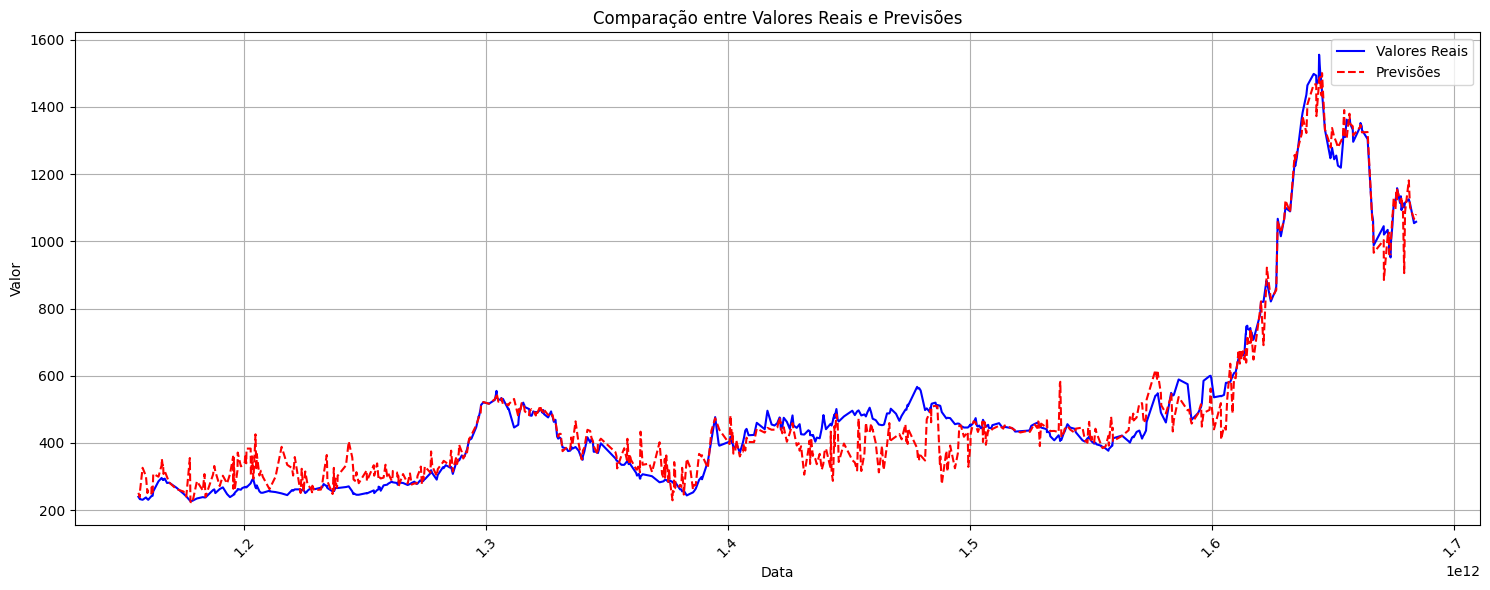

In [1]:
# 1. Instalação e Importação
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_URAMI.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()
print(df_actual_vs_predicted.head())

# 9. Visualização das previsões vs valores reais
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

# Extracting the "Data" column from the test set
dates = test["Data"].as_data_frame().values

# Visualização das previsões vs valores reais
plt.figure(figsize=(15, 6))

# Use 'dates' for the x-axis
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")

plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if they overlap
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()



SEM URADI

In [1]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

from h2o.automl import H2OAutoML

# 1. Instalação e Importação
# (Já fornecido)

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_URAD.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Data", "Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted['Data'] = pd.to_datetime(df_actual_vs_predicted['Data'], unit='ms')
df_actual_vs_predicted['Mes_Ano'] = df_actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais
dates = df_actual_vs_predicted["Mes_Ano"].values
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Microsoft-40648 (build 11.0.16.1+1-LTS, mixed mode)
  Starting server from C:\Users\milen\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\milen\AppData\Local\Temp\tmp4ej_qyke
  JVM stdout: C:\Users\milen\AppData\Local\Temp\tmp4ej_qyke\h2o_milen_started_from_python.out
  JVM stderr: C:\Users\milen\AppData\Local\Temp\tmp4ej_qyke\h2o_milen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 9 days !!!"
H2O_cluster_name:,H2O_from_python_milen_06sgun
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.924 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:57:17.432: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:57:17.447: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████